# K Nearest Neighbor Evaluation

In [1]:
import os
import numpy as np
import torch

from sklearn.neighbors import KNeighborsClassifier

from bring_features_and_file_paths import get_BirdNET_detections
from bring_features_and_file_paths import get_spectrogram_time_mark_in_file
from bring_features_and_file_paths import bring_features_and_file_paths
from bring_features_and_file_paths import from_spectrogram_path_to_BirdNET_output_path

import matplotlib.pyplot as plt

from datetime import datetime

from tqdm import tqdm

import seaborn as sns

In [2]:
device_to_location = {
    4862: "Grassland 1",
    4879: "Grassland 2",
    23734: "Forest 1",
    23764: "Forest 2",
    23795: "Forest 3",
    23771: "Forest 4",
    23757: (datetime(month=7, day=14, year=2021, hour=14, second=55), ["Forest 3", "Forest 5"]),
    23700: "Forest 6",
}

In [3]:
feats, fpaths = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Features/', sub_sample=None)
# feats, fpaths = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Second_Features/', sub_sample=None)
indices = torch.randperm(feats.size()[0])
feats=feats[indices]
fpaths=fpaths[indices]

We have 101076 feature vectors.


In [4]:
aspect='detection'

vectors=[]
labels=[]
BirdNET_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/BirdNET_Output'
Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/Second_Filtered_Spectrograms/'
# Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/First_Filtered_Spectrograms'
spectrogram_duration = 9.0
for k, (fpath, feat) in enumerate(tqdm(zip(fpaths,feats), total=len(feats))):
    file_path = ''.join([chr(int(x)) for x in fpath]).replace('~','')
    BirdNET_PATH = from_spectrogram_path_to_BirdNET_output_path(fpath)

    try:
        start_time = get_spectrogram_time_mark_in_file(fpath, spectrogram_duration)

        interval = (start_time, start_time + spectrogram_duration)
        data_elements = get_BirdNET_detections(os.path.join(BirdNET_BASE_PATH, BirdNET_PATH), interval, confidence_threshold = 0.0)


        for data_element in data_elements:
            device=int(data_element['device'])
            if device!=23788:
                if aspect=='location':
                    location = device_to_location[device]
                    if isinstance(location, tuple):
                        date = datetime(month=data_element['month'], day=data_element['day'], year=data_element['year'], hour=data_element['hour'], second=data_element['second'])
                        if date < location[0]:
                            data_element['location'] = location[1][0]
                        else:
                            data_element['location'] = location[1][1]
                    else:
                        data_element['location'] = location

                vectors.append(np.array(feat))
                labels.append(data_element[aspect])

    except:
        print("Something was wrong with")
        print(file_path)


    if k > 200000:
        break

vectors=np.array(vectors)
labels=np.array(labels)
unique_labels=np.unique(labels)
aux=[]
for label in labels:
    aux.append(np.where(unique_labels==label)[0].item())
    
labels=np.array(aux)

  5%|▍         | 4878/101076 [00:27<06:09, 260.52it/s]

Something was wrong with
                                                                                 


  7%|▋         | 6900/101076 [00:35<05:46, 271.53it/s]

Something was wrong with
                                                                                 


 15%|█▌        | 15319/101076 [01:42<05:00, 285.63it/s]  

Something was wrong with
                                                                                 


 25%|██▌       | 25269/101076 [02:19<04:14, 297.80it/s]

Something was wrong with
                                                                                 


 50%|████▉     | 50386/101076 [03:55<02:49, 298.90it/s]

Something was wrong with
                                                                                 


 84%|████████▍ | 84802/101076 [06:20<01:01, 264.23it/s]

Something was wrong with
                                                                                 


 85%|████████▍ | 85426/101076 [06:23<01:02, 252.16it/s]

Something was wrong with
                                                                                 


 99%|█████████▉| 100288/101076 [07:20<00:02, 277.14it/s]

Something was wrong with
                                                                                 


100%|██████████| 101076/101076 [07:23<00:00, 227.69it/s]


In [9]:
if aspect=='detection':
    mask=np.array([unique_labels=='Blue Jay'])
    mask=np.logical_or(mask,np.array([unique_labels=='Eastern Wood-Pewee']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Great Crested Flycatcher']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Hairy Woodpecker']))
    mask=np.logical_or(mask,np.array([unique_labels=='Indigo Bunting']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Ovenbird']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Red-eyed Vireo']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Scarlet Tanager']))
#     mask=np.logical_or(mask,np.array([unique_labels=='Tree Swallow']))
    mask=np.logical_or(mask,np.array([unique_labels=='No detection']))

    chosen_labels=np.where(mask[0])[0]
    chosen_labels

    def find_indices(A, B):
        indices = np.where(np.isin(A, B))
        return indices

    indices=find_indices(labels, chosen_labels)[0]

    vectors = vectors[indices]
    labels = labels[indices]


In [10]:
vectors.shape

(88693, 384)

In [11]:
labels.shape

(88693,)

In [12]:
unique_labels

array(['American Crow', 'American Goldfinch', 'American Redstart',
       'American Robin', 'Baltimore Oriole', 'Barn Swallow',
       'Belted Kingfisher', 'Black-and-white Warbler',
       'Black-bellied Whistling-Duck', 'Black-capped Chickadee',
       'Black-crowned Night-Heron', 'Blue Jay', 'Blue-gray Gnatcatcher',
       'Brown-headed Cowbird', 'Canada Goose', 'Caspian Tern',
       'Cedar Waxwing', 'Chimney Swift', 'Chipping Sparrow',
       'Common Grackle', 'Common Nighthawk', 'Common Yellowthroat',
       "Cooper's Hawk", 'Downy Woodpecker', 'Eastern Bluebird',
       'Eastern Kingbird', 'Eastern Phoebe', 'Eastern Towhee',
       'Eastern Wood-Pewee', 'European Starling', 'Field Sparrow',
       'Gray Catbird', 'Great Blue Heron', 'Great Crested Flycatcher',
       'Great Egret', 'Green Heron', 'Hairy Woodpecker', 'House Finch',
       'House Sparrow', 'House Wren', 'Indigo Bunting', 'Killdeer',
       'Mallard', 'Marsh Wren', 'Mourning Dove', 'No detection',
       'Northern 

In [13]:
performances=[]
performances_per_label=[]
# jumps=list(np.arange(1,21,4))
jumps=[5,10,15,20]
for n in tqdm(jumps):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(vectors, labels)
    label_predictions=neigh.predict(vectors)
    performances.append(np.sum(label_predictions==labels)/labels.shape[0])
    
    per_label_performance=[]
    for label in range(len(unique_labels)):
        indices=np.where(labels==label)
        per_label_performance.append(np.sum(label_predictions[indices]==label)/indices[0].shape[0])
        
    per_label_performance=np.array(per_label_performance)
    performances_per_label.append(per_label_performance)

performances=np.array(performances)
performances_per_label=np.array(performances_per_label)

  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_44764/4281146875.py:14: RuntimeWarning: invalid value encountered in long_scalars
  per_label_performance.append(np.sum(label_predictions[indices]==label)/indices[0].shape[0])
 25%|██▌       | 1/4 [00:20<01:01, 20.64s/it]/tmp/ipykernel_44764/4281146875.py:14: RuntimeWarning: invalid value encountered in long_scalars
  per_label_performance.append(np.sum(label_predictions[indices]==label)/indices[0].shape[0])
 50%|█████     | 2/4 [00:40<00:40, 20.28s/it]/tmp/ipykernel_44764/4281146875.py:14: RuntimeWarning: invalid value encountered in long_scalars
  per_label_performance.append(np.sum(label_predictions[indices]==label)/indices[0].shape[0])
 75%|███████▌  | 3/4 [01:00<00:20, 20.08s/it]/tmp/ipykernel_44764/4281146875.py:14: RuntimeWarning: invalid value encountered in long_scalars
  per_label_performance.append(np.sum(label_predictions[indices]==label)/indices[0].shape[0])
100%|██████████| 4/4 [01:20<00:00, 20.07s/it]


Text(0, 0.5, 'Performance')

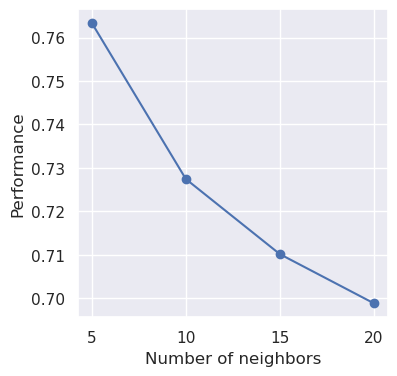

In [17]:
#aux=np.array([int(j+1) for j in range(jumps)])
aux=jumps
plt.figure(figsize=(4,4))
plt.plot(aux, performances, marker='o')
plt.xticks(aux)
plt.xlabel('Number of neighbors')
plt.ylabel('Performance')

Text(28.75, 0.5, 'Number of neighbors')

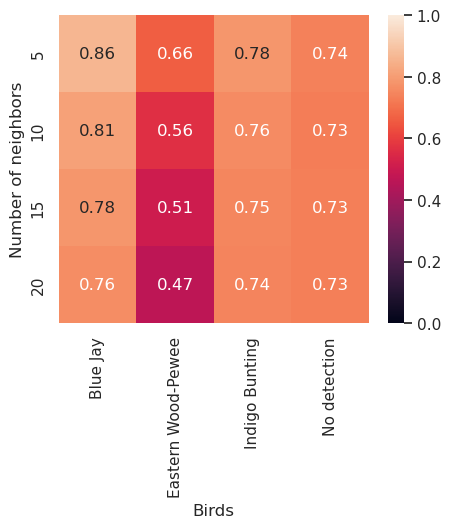

In [16]:
# sns.set(font_scale=20)
sns.set (rc = {'figure.figsize':(5,4)}) # detection
# sns.set (rc = {'figure.figsize':(8,4)}) # detection
# sns.set (rc = {'figure.figsize':(22,4)}) # hour
#sns.set (rc = {'figure.figsize':(10,4)}) # location
# sns.set (rc = {'figure.figsize':(15,4)}) # week
# sns.set (rc = {'figure.figsize':(5,4)}) # month
#sns.set (rc = {'figure.figsize':(55, 10)})
sns.heatmap(performances_per_label[:,chosen_labels], xticklabels=unique_labels[chosen_labels], yticklabels=aux, annot=True, fmt=".2f", vmin=0.0, vmax=1.0)
#sns.heatmap(performances_per_label, xticklabels=unique_labels, yticklabels=aux, annot=True, fmt=".2f", vmin=0.0, vmax=1.0)
#plt.xlabel('Devices')
plt.xlabel('Birds')
plt.ylabel('Number of neighbors')

In [ ]:
# sns.set(font_scale=20)
sns.set (rc = {'figure.figsize':(6,4)}) # detection
# sns.set (rc = {'figure.figsize':(22,4)}) # hour
#sns.set (rc = {'figure.figsize':(8,4)}) # location
# sns.set (rc = {'figure.figsize':(15,4)}) # week
# sns.set (rc = {'figure.figsize':(5,4)}) # month
#sns.set (rc = {'figure.figsize':(55, 10)})
sns.heatmap(performances_per_label[:,chosen_labels], xticklabels=unique_labels[chosen_labels], yticklabels=False, annot=True, fmt=".2f", vmin=0.0, vmax=1.0, cbar=False)
#sns.heatmap(performances_per_label[:,chosen_labels], xticklabels=False, yticklabels=False, annot=True, fmt=".2f", vmin=0.0, vmax=1.0, cbar=False)
#sns.heatmap(performances_per_label, xticklabels=unique_labels, yticklabels=False, annot=True, fmt=".2f", vmin=0.0, vmax=1.0, cbar=False)
# sns.heatmap(performances_per_label, xticklabels=unique_labels, yticklabels=aux, annot=True, fmt=".2f", vmin=0.0, vmax=1.0, cbar=False)
#plt.xlabel('Devices')
# plt.xlabel('Month')
# plt.ylabel('Number of neighbors')

#plt.savefig(f"heatmap_{aspect}.png", dpi=300)
plt.savefig(f"heatmap_{aspect}.png", dpi=300, bbox_inches='tight')

In [ ]:
int(data_element['device'])

In [ ]:
performances